# Chapter 9

## Question 8

Applying SVMs to the `OJ` data set

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn.model_selection
import sklearn.svm
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline

In [2]:
oj_dataset = sm.datasets.get_rdataset("OJ", "ISLR").data
oj_dataset.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


### (a) Create  a training set containing a random sample of 800 observations, and a test set containing the remainder.

In [3]:
X = oj_dataset.drop(columns="Purchase")
# Dummy-encode the categorical (here "Store7")
X = pd.concat([X, pd.get_dummies(X["Store7"], prefix="Store7", drop_first=True)],axis=1).drop(columns="Store7")


y = oj_dataset.Purchase
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=len(oj_dataset)-800)

### (b) Fit an SVC to the training data using C=0.01. Produce summary statistics and describe the results.

In [4]:
linear_svm = sklearn.svm.SVC(kernel="linear",C=0.01,max_iter=1e6)
linear_svm.fit(X_train, y_train)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=1000000.0, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

The number of support vectors: 616
Confusion matrix on the training data:
[[435  49]
 [117 199]]


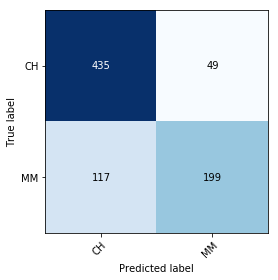

F1-score on the training data: 0.84
Confusion matrix on the test data:
[[146  23]
 [ 41  60]]


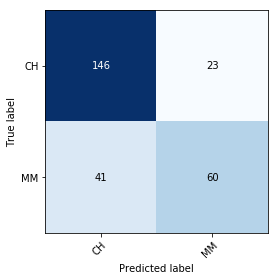

F1-score on the test data: 0.82


In [6]:
# What summary statistics would R give us?
# The number of support vectors
print(f"The number of support vectors: {len(linear_svm.support_vectors_)}")
train_conf_matrix = sklearn.metrics.confusion_matrix(y_train, linear_svm.predict(X_train))
print(f"Confusion matrix on the training data:\n{train_conf_matrix}")
plot_confusion_matrix(y_train, linear_svm.predict(X_train), linear_svm.classes_)
plt.show()
train_f1 = sklearn.metrics.f1_score(y_train, linear_svm.predict(X_train), pos_label="CH")
print(f"F1-score on the training data: {train_f1:.2f}")
test_conf_matrix = sklearn.metrics.confusion_matrix(y_test, linear_svm.predict(X_test))
print(f"Confusion matrix on the test data:\n{test_conf_matrix}")
test_f1 = sklearn.metrics.f1_score(y_test, linear_svm.predict(X_test), pos_label="CH")
plot_confusion_matrix(y_test, linear_svm.predict(X_test), linear_svm.classes_)
plt.show()

print(f"F1-score on the test data: {test_f1:.2f}")




We are prone to predicting "CH" when the true value is "MM", on both the test and training data.

Confusion matrix on the training data:
[[427  57]
 [ 74 242]]


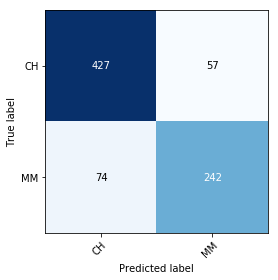

F1-score on the training data: 0.87
Confusion matrix on the test data:
[[144  25]
 [ 27  74]]


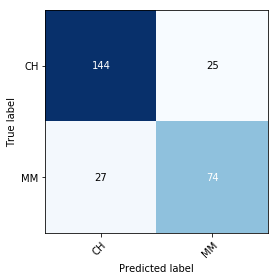

F1-score on the test data: 0.85


In [7]:
# Try scaling all the data
scaler = sklearn.preprocessing.StandardScaler()
svm =  sklearn.svm.SVC(kernel="linear",C=0.01,max_iter=1e6)

pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("linear svm", svm)])
pipe.fit(X_train, y_train)


train_conf_matrix = sklearn.metrics.confusion_matrix(y_train, pipe.predict(X_train))
print(f"Confusion matrix on the training data:\n{train_conf_matrix}")
plot_confusion_matrix(y_train, pipe.predict(X_train), pipe.classes_)
plt.show()
train_f1 = sklearn.metrics.f1_score(y_train, pipe.predict(X_train), pos_label="CH")
print(f"F1-score on the training data: {train_f1:.2f}")
test_conf_matrix = sklearn.metrics.confusion_matrix(y_test, pipe.predict(X_test))
print(f"Confusion matrix on the test data:\n{test_conf_matrix}")
test_f1 = sklearn.metrics.f1_score(y_test, pipe.predict(X_test), pos_label="CH")
plot_confusion_matrix(y_test, pipe.predict(X_test), pipe.classes_)
plt.show()

print(f"F1-score on the test data: {test_f1:.2f}")




We see that the problem is alleviated somewhat if the data is scaled beforehand

### (c) What are the training and  test error rates?

In [8]:
print(f"Training misclassification rate: {sklearn.metrics.zero_one_loss(y_train, pipe.predict(X_train)):.2f}")
print(f"Test misclassification rate: {sklearn.metrics.zero_one_loss(y_test, pipe.predict(X_test)):.2f}")

Training misclassification rate: 0.16
Test misclassification rate: 0.19


### (d) Use the `tune()` function (I'll use GridSearchCV instead) to select an optimal `cost` (here `C`). Consider values in the range 0.01 to 10

In [9]:
scaler = sklearn.preprocessing.StandardScaler()
svm =  sklearn.svm.SVC(kernel="linear",max_iter=1e6)

pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("svm", svm)])

params = {"svm__C": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0]}
linear_svm_cv = sklearn.model_selection.GridSearchCV(pipe, params, cv=5, n_jobs=4).fit(X,y)

In [10]:
best_linear_svm = linear_svm_cv.best_estimator_
print(f"Optimal value of C: {best_linear_svm.get_params()['svm__C']}")

Optimal value of C: 0.3


### (e) Compute the training and test error rates using this new value for `cost` (C)

Training misclassification rate: 0.16
Test misclassification rate: 0.19


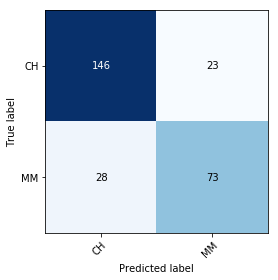

In [11]:
print(f"Training misclassification rate: {sklearn.metrics.zero_one_loss(y_train, best_linear_svm.predict(X_train)):.2f}")
print(f"Test misclassification rate: {sklearn.metrics.zero_one_loss(y_test, best_linear_svm.predict(X_test)):.2f}")
plot_confusion_matrix(y_test, best_linear_svm.predict(X_test), best_linear_svm.classes_)


### (f) Repeat parts (b) through (e) using an SVM with a radial kernel - use a default value for `gamma`

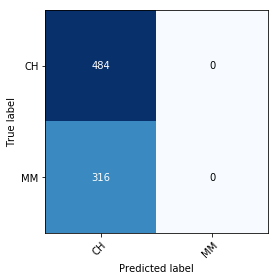

F1-score on the training data: 0.75


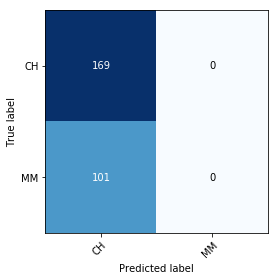

F1-score on the test data: 0.77
Training misclassification rate: 0.40
Test misclassification rate: 0.37

Optimal value of C for radial SVM: 0.6
Training misclassification rate: 0.14
Test misclassification rate: 0.17


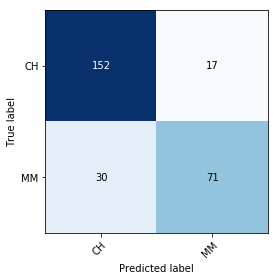

In [12]:
# Try scaling all the data
scaler = sklearn.preprocessing.StandardScaler()
svm =  sklearn.svm.SVC(kernel="rbf",C=0.01,max_iter=1e6, gamma="scale")

pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("radial svm", svm)])
pipe.fit(X_train, y_train)


plot_confusion_matrix(y_train, pipe.predict(X_train), pipe.classes_)
plt.show()
train_f1 = sklearn.metrics.f1_score(y_train, pipe.predict(X_train), pos_label="CH")
print(f"F1-score on the training data: {train_f1:.2f}")


test_f1 = sklearn.metrics.f1_score(y_test, pipe.predict(X_test), pos_label="CH")
plot_confusion_matrix(y_test, pipe.predict(X_test), pipe.classes_)
plt.show()

print(f"F1-score on the test data: {test_f1:.2f}")

print(f"Training misclassification rate: {sklearn.metrics.zero_one_loss(y_train, pipe.predict(X_train)):.2f}")
print(f"Test misclassification rate: {sklearn.metrics.zero_one_loss(y_test, pipe.predict(X_test)):.2f}")

scaler = sklearn.preprocessing.StandardScaler()
svm =  sklearn.svm.SVC(kernel="rbf", gamma="scale",max_iter=1e6)

pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("svm", svm)])

params = {"svm__C": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0]}
radial_svm_cv = sklearn.model_selection.GridSearchCV(pipe, params, cv=5, n_jobs=4).fit(X,y)
best_radial_svm = radial_svm_cv.best_estimator_
print()
print(f"Optimal value of C for radial SVM: {best_radial_svm.get_params()['svm__C']}")
      
print(f"Training misclassification rate: {sklearn.metrics.zero_one_loss(y_train, best_radial_svm.predict(X_train)):.2f}")
print(f"Test misclassification rate: {sklearn.metrics.zero_one_loss(y_test, best_radial_svm.predict(X_test)):.2f}")
plot_confusion_matrix(y_test, best_radial_svm.predict(X_test), best_radial_svm.classes_)
plt.show()

### (g) Repeat parts (b) through (e) using an SVM with a polynomial kernel - use a degree = 2

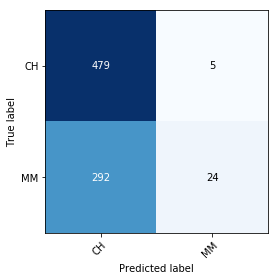

F1-score on the training data: 0.76


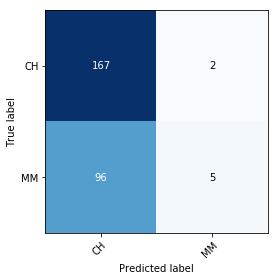

F1-score on the test data: 0.77
Training misclassification rate: 0.37
Test misclassification rate: 0.36

Optimal value of C for radial SVM: 10.0
Training misclassification rate: 0.19
Test misclassification rate: 0.23


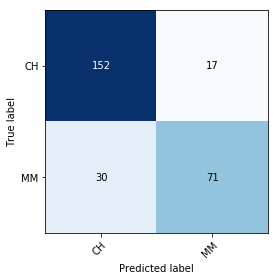

In [13]:
# Try scaling all the data
scaler = sklearn.preprocessing.StandardScaler()
svm =  sklearn.svm.SVC(kernel="poly",C=0.01,max_iter=1e6, gamma="scale", degree=2)

pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("poly svm", svm)])
pipe.fit(X_train, y_train)


plot_confusion_matrix(y_train, pipe.predict(X_train), pipe.classes_)
plt.show()
train_f1 = sklearn.metrics.f1_score(y_train, pipe.predict(X_train), pos_label="CH")
print(f"F1-score on the training data: {train_f1:.2f}")


test_f1 = sklearn.metrics.f1_score(y_test, pipe.predict(X_test), pos_label="CH")
plot_confusion_matrix(y_test, pipe.predict(X_test), pipe.classes_)
plt.show()

print(f"F1-score on the test data: {test_f1:.2f}")

print(f"Training misclassification rate: {sklearn.metrics.zero_one_loss(y_train, pipe.predict(X_train)):.2f}")
print(f"Test misclassification rate: {sklearn.metrics.zero_one_loss(y_test, pipe.predict(X_test)):.2f}")

scaler = sklearn.preprocessing.StandardScaler()
svm =  sklearn.svm.SVC(kernel="poly", gamma="scale",max_iter=1e6, degree=2)

pipe = sklearn.pipeline.Pipeline(steps=[("scaling", scaler), ("svm", svm)])

params = {"svm__C": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0]}
poly_svm_cv = sklearn.model_selection.GridSearchCV(pipe, params, cv=5, n_jobs=4).fit(X,y)
best_poly_svm = poly_svm_cv.best_estimator_
print()
print(f"Optimal value of C for radial SVM: {best_poly_svm.get_params()['svm__C']}")
      
print(f"Training misclassification rate: {sklearn.metrics.zero_one_loss(y_train, best_poly_svm.predict(X_train)):.2f}")
print(f"Test misclassification rate: {sklearn.metrics.zero_one_loss(y_test, best_poly_svm.predict(X_test)):.2f}")
plot_confusion_matrix(y_test, best_radial_svm.predict(X_test), best_poly_svm.classes_)
plt.show()

### (h) Overall, which approach seems to give the best results?

It seems like the radial kernel, with C=0.6, gives the best results on this data set, closely followed by the linear kernel.